<a href="https://colab.research.google.com/github/reheinrich/shap-tutorials/blob/main/shap-basic-guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import all required libraries

In [32]:
# In Google Colab, you need to install the SHAP library first
# ! pip install shap

In [ ]:
# We use the SHAP library to estimate and visualize Shapley values
import shap

# We use the XGBoost implementation from the xgboost library
import xgboost

# We use this function from the Scikit-learn library to split our dataset into a training dataset and a test dataset
from sklearn.model_selection import train_test_split

# We use this function from the Scikit-learn library to compute the mean squared error of the model's predictions
from sklearn.metrics import mean_squared_error

# 2. Load the sample dataset

Load the California housing dataset (https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)

In [ ]:
# X is the features and y is the targets
X,y = shap.datasets.california()

Split the dataset into a training dataset and a test dataset, using 80% of the instances for the training dataset and 20% of the instances for the test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Train an XGBoost model

Initialize an XGBoost model for regression tasks

In [ ]:
model = xgboost.XGBRegressor()

Train the XGBoost model on the training dataset

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Make predictions on the test dataset using the XGBoost model

In [ ]:
predictions = model.predict(X_test)

Calculate the prediction error for the test dataset using the mean squared error

In [ ]:
mse = mean_squared_error(y_test, predictions)
print("MSE: %f" % (mse))

MSE: 0.213793


# 4. Explain the XGBoost model using the SHAP library

## 4.1. Estimate the Shapley values

Initialize an explainer that estimates Shapley values using SHAP

Here we use the training dataset X_train to compute the base value

In [ ]:
explainer = shap.Explainer(model=model, masker=X_train) 

As you can see below, the Tree SHAP algorithm is used to estimate the Shapley values

Tree SHAP is a method specifically designed for tree models and tree ensembles that estimates Shapley values quickly and accurately.

In [ ]:
explainer.__class__

shap.explainers._tree.Tree

Estimate the Shapley values for the test dataset

In [ ]:
shap_values = explainer(X_test)

 99%|===================| 4068/4128 [00:20<00:00]       

## 4.2. Local explanations

Local explanations are explanations for individual predictions of the model

### Waterfall Plot

Visualize the Shapley values for the prediction of the first instance in the test dataset using a waterfall plot

The waterfall plot shows how we get from shap_values.base_values to model.predict(X_test)[0]

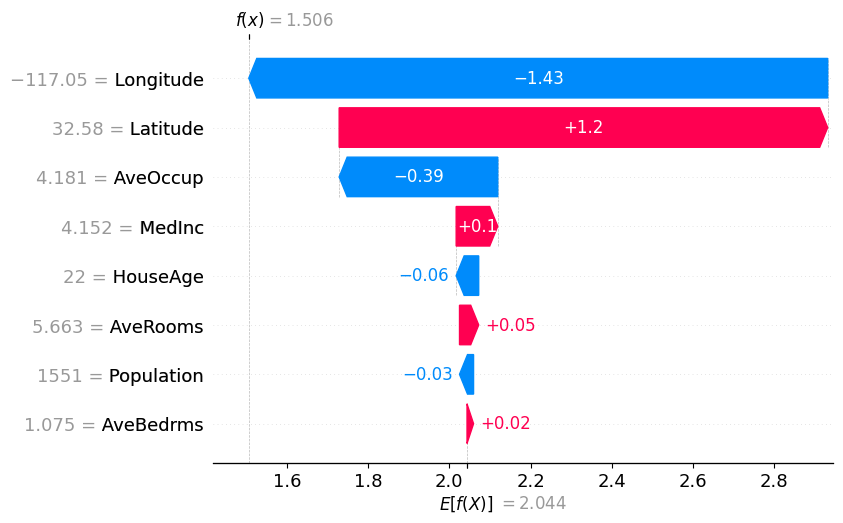

In [ ]:
shap.plots.waterfall(shap_values[0])

### Force Plot

For visualizations using force plots, the Javascript library must be loaded

In [ ]:
shap.initjs() 

Visualize the Shapley values for the prediction of the first instance in the test dataset using a force plot

In [30]:
shap.initjs()
shap.plots.force(shap_values[0])

## 4.3. Global explanations

Global explanations describe the overall behavior of the model

### Bar Plot

Visualize the Shapley values for the entire test dataset using a bar plot

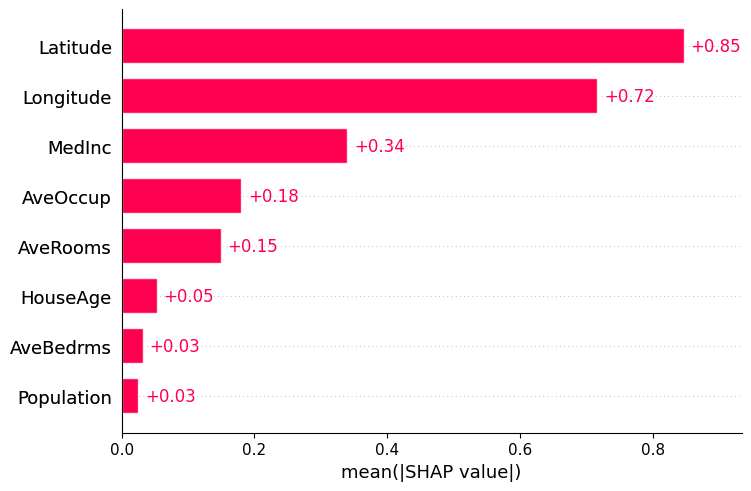

In [ ]:
shap.plots.bar(shap_values)

The max_display parameter can be used to set the maximum number of bars to be displayed in the bar plot

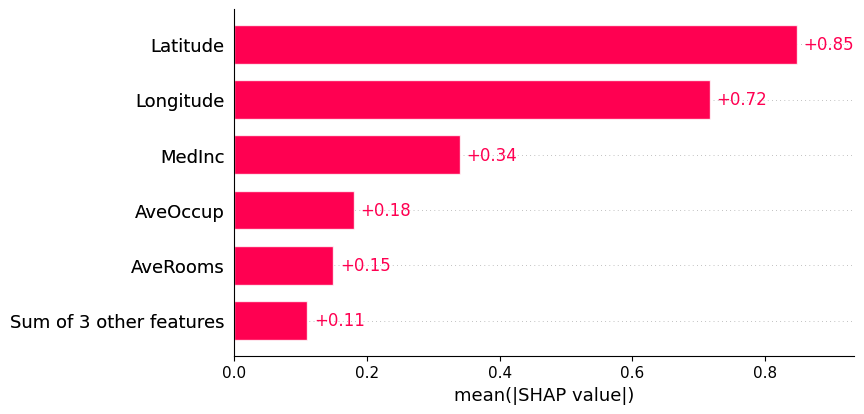

In [ ]:
shap.plots.bar(shap_values, max_display=6)

### Beeswarm Plot

Visualize the Shapley values for the entire test dataset using a beeswarm plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


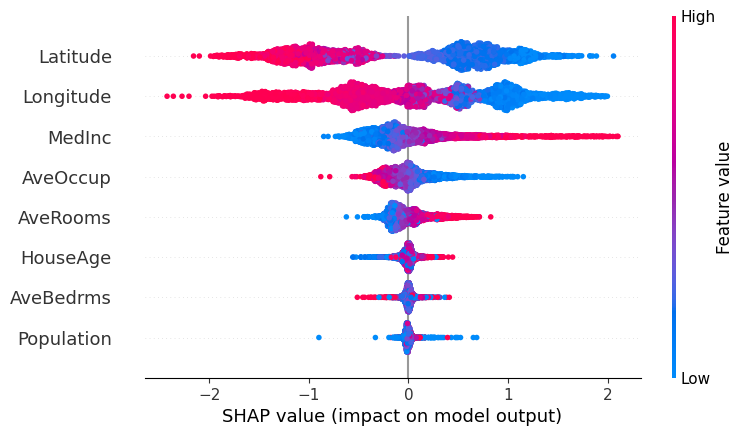

In [ ]:
shap.plots.beeswarm(shap_values)

### Force Plot

Visualize the Shapley values for the entire test dataset using a force plot

In [29]:
shap.initjs()
shap.plots.force(shap_values[0:100])